In [160]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [161]:
cd /Share/home/chenxupeng/projects/economics/

/Share/home/chenxupeng/projects/economics


check dimension 没有问题，完全一致

In [168]:
filenamess = ['L3_1_DVA_FIN.RData']#,'L3_4_RDV.RData','L3_6_FVA_INT.RData','L3_2_DVA_INT.RData','L3_5_FVA_FIN.RData','L3_7_DDC.RData','L3_3_DVA_INTrex.RData','L3_5_MVA.RData','L3_8_FDC.RData']
years = ['2001']

In [170]:
for i in filenamess:
    for j in years:
        print pd.read_csv(j+'/'+j+'_'+i+'_dim.csv')['x']

0    1435
1    1435
2      41
Name: x, dtype: int64


In [171]:
rownamestd = pd.read_csv('2001/2001_L3_1_DVA_FIN.RData_rownames.csv')['x']
colnamestd = pd.read_csv('2001/2001_L3_1_DVA_FIN.RData_colnames.csv')['x']

In [172]:
colname = np.ndarray([1435,2]).astype('str')
for i in range(1435):
    colname[i] = colnamestd[i].split('.')
rowname = np.ndarray([1435,2]).astype('str')
for j in range(1435):
    rowname[j] = rownamestd[j].split('.')
rowlist = []
for i in range(1435):
    rowlist.append(float(rowname[:,1][i][1:]))
collist = []
for i in range(1435):
    collist.append(float(colname[:,1][i][1:]))

(array([   40.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1394.]),
 array([-34. , -30.5, -27. , -23.5, -20. , -16.5, -13. ,  -9.5,  -6. ,
         -2.5,   1. ]),
 <a list of 10 Patch objects>)

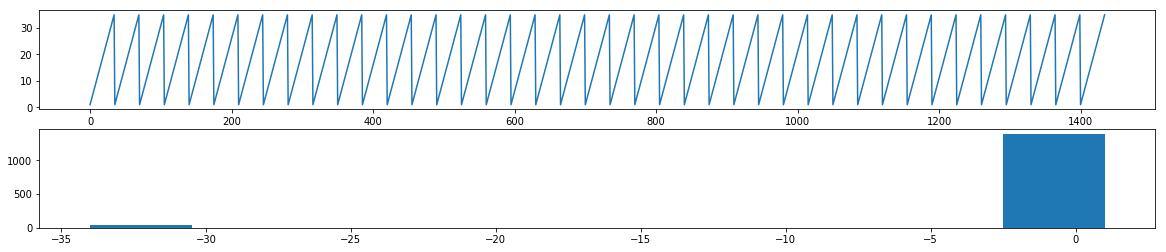

In [173]:
fig,ax = plt.subplots(2,figsize=(20,4))
ax[0].plot(rowlist)
ax[1].hist(np.array(collist[1:]) - np.array(collist[:-1]),bins = 10)

In [174]:
_, idx = np.unique(rowname[:,0], return_index=True)
unicout =  rowname[:,0][np.sort(idx)]
def counencoder(arr):
    for i in range(41):
        arr[np.where(arr==unicout[i])[0]] =i
    return arr.astype('int')
rowcountrystd = counencoder(rowname[:,0])
colcountrystd = counencoder(colname[:,0])

Text(0.5,1,u'col country name change each block (meets expectation)')

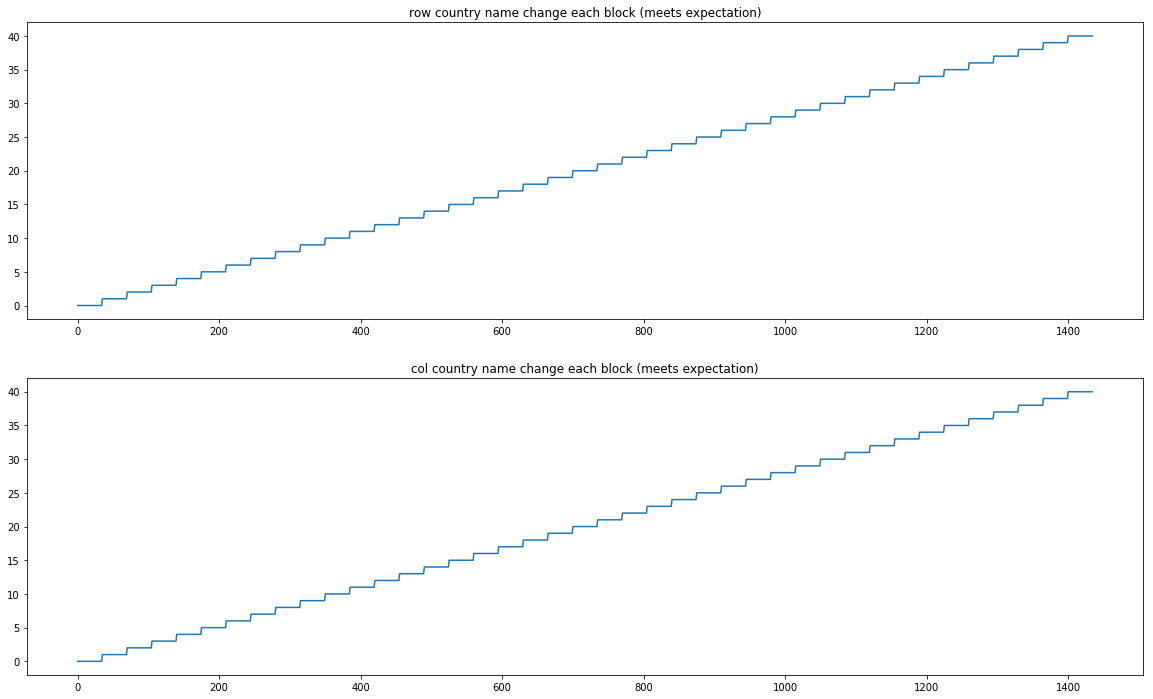

In [175]:
fig,ax = plt.subplots(2,figsize=(20,12))
ax[0].plot(rowcountrystd)
ax[0].set_title('row country name change each block (meets expectation)')
ax[1].plot(colcountrystd)
ax[1].set_title('col country name change each block (meets expectation)')

In [176]:
def check(filenames):
    row = pd.read_csv(filenames+'_rownames.csv')['x']
    col = pd.read_csv(filenames+'_colnames.csv')['x']
    colname = np.ndarray([1435,2]).astype('str')
    for i in range(1435):
        colname[i] = col[i].split('.')
    rowname = np.ndarray([1435,2]).astype('str')
    for j in range(1435):
        rowname[j] = row[j].split('.')
    rowlist = []
    for i in range(1435):
        rowlist.append(float(rowname[:,1][i][1:]))
    collist = []
    for i in range(1435):
        collist.append(float(colname[:,1][i][1:]))
    if np.unique(np.array(collist[1:]) - np.array(collist[:-1])).shape[0] !=2:
        print filename +'c* col error'
    elif np.unique(np.array(rowlist[1:]) - np.array(rowlist[:-1])).shape[0] !=2:
        print filename +'c* row error'
    else:
        print 'c* right'
    rowcountry = counencoder(rowname[:,0])
    colcountry = counencoder(colname[:,0])
    if np.abs(rowcountry - rowcountrystd).sum() !=0:
        print filename +'row name error'
    elif np.abs(colcountry - colcountrystd).sum() !=0:
        print filename +'col name error'
    else:
        print 'row and col right'

In [129]:
filenamess[0]

'L3_1_DVA_FIN.RData'

In [178]:
for j in years:
    filenames = j+'/'+j+'_'+'L3_1_DVA_FIN.RData'
    row = pd.read_csv(filenames+'_rownames.csv')['x']
    rowname = np.ndarray([1435,2]).astype('str')
    for j in range(1435):
        rowname[j] = row[j].split('.')
    rowlist = []
    for i in range(1435):
        rowlist.append(float(rowname[:,1][i][1:]))
    print np.unique(rowname[:,0])

['AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHN' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP'
 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HUN' 'IDN' 'IND' 'IRL' 'ITA' 'JPN' 'KOR'
 'LTU' 'LUX' 'LVA' 'MEX' 'MLT' 'NLD' 'POL' 'PRT' 'ROM' 'RUS' 'RoW' 'SVK'
 'SVN' 'SWE' 'TUR' 'TWN' 'USA']


In [179]:
unicout

array(['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHN', 'CYP', 'CZE',
       'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN',
       'IDN', 'IND', 'IRL', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA',
       'MEX', 'MLT', 'NLD', 'POL', 'PRT', 'ROM', 'RUS', 'SVK', 'SVN',
       'SWE', 'TUR', 'TWN', 'USA', 'RoW'], 
      dtype='|S32')

In [180]:
_, idx = np.unique(rowname[:,0], return_index=True)
rowname[:,0][np.sort(idx)]

array(['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHN', 'CYP', 'CZE',
       'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN',
       'IDN', 'IND', 'IRL', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA',
       'MEX', 'MLT', 'NLD', 'POL', 'PRT', 'ROM', 'RUS', 'SVK', 'SVN',
       'SWE', 'TUR', 'TWN', 'USA', 'RoW'], 
      dtype='|S32')

In [181]:
np.where(rowname[:,0]=='AUS')[0].shape[0]

35

In [184]:
def CHN(filenames):
    row = pd.read_csv(filenames+'_rownames.csv')['x']
    col = pd.read_csv(filenames+'_colnames.csv')['x']
    colname = np.ndarray([1435,2]).astype('str')
    for i in range(1435):
        colname[i] = col[i].split('.')
    rowname = np.ndarray([1435,2]).astype('str')
    for j in range(1435):
        rowname[j] = row[j].split('.')
    print np.where(rowname[:,0]=='CHN')[0].shape[0]

In [185]:
for i in filenamess:
    for j in years:
        CHN(j+'/'+j+'_'+i)

35
